In [1]:
import numpy as np

with np.load("../assets/weather_data.npz") as weather:
    wind_u = weather["wind_u"]
    wind_v = weather["wind_v"]
    temperature = weather["temperature"]
    rain = weather["rain"]
    
    uk_mask = weather["uk"]
    irl_mask = weather["ireland"]
    spain_mask = weather["spain"]

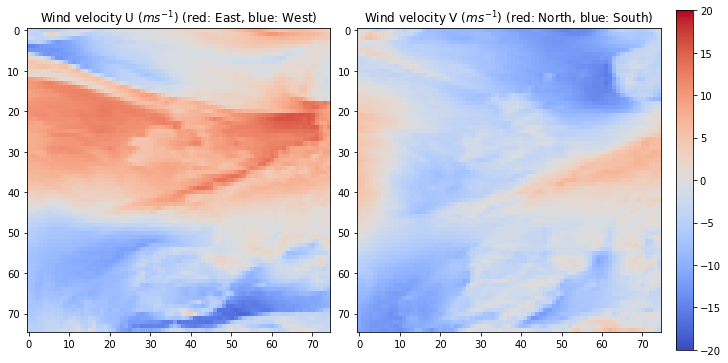

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(
    ncols=2,  # two subplot, side by side
    figsize=(10,5),  # make the figure a little bigger
    constrained_layout=True,  # make the best use of the space
)

# The two subplots are ax[0] and ax[1]
# coolwarm is a diverging colour map
# Pass the vmin and vmax to set them to the same scale
im_u = ax[0].imshow(wind_u, cmap="coolwarm", vmin=-20, vmax=20)
im_v = ax[1].imshow(wind_v, cmap="coolwarm", vmin=-20, vmax=20)

fig.colorbar(im_v, ax=ax[1])

ax[0].title.set_text("Wind velocity U ($ms^{-1}$) (red: East, blue: West)")
ax[1].title.set_text("Wind velocity V ($ms^{-1}$) (red: North, blue: South)")

In [4]:
wind_speed = np.sqrt(wind_u ** 2 + wind_v ** 2)

In [5]:
wind_dir = np.degrees(np.arctan2(wind_u, wind_v))  # clockwise from North

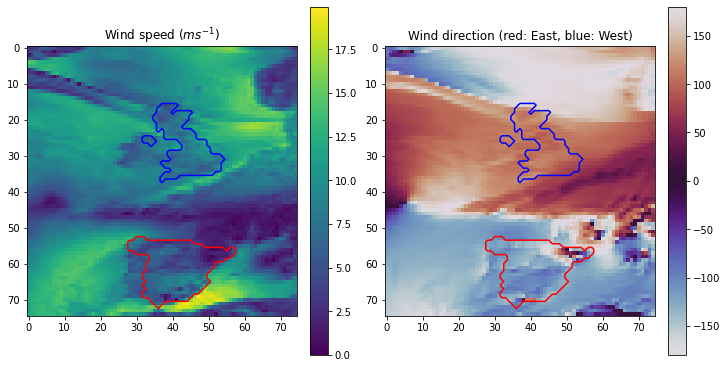

In [29]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=2, figsize=(10,5), constrained_layout=True)
im_s = ax[0].imshow(wind_speed, vmin=0)
im_d = ax[1].imshow(wind_dir, cmap="twilight")  # twilight is a cyclic colour map

ax[0].title.set_text("Wind speed ($ms^{-1}$)")
ax[1].title.set_text("Wind direction (red: East, blue: West)")

# add the masks to the subplots
for i in range(2):
    ax[i].contour(uk_mask, colors="b", levels = [0.5])
    ax[i].contour(spain_mask, colors="r", levels = [0.5])

# add the colorbars to the subplots
fig.colorbar(im_s, ax=ax[0])
fig.colorbar(im_d, ax=ax[1])

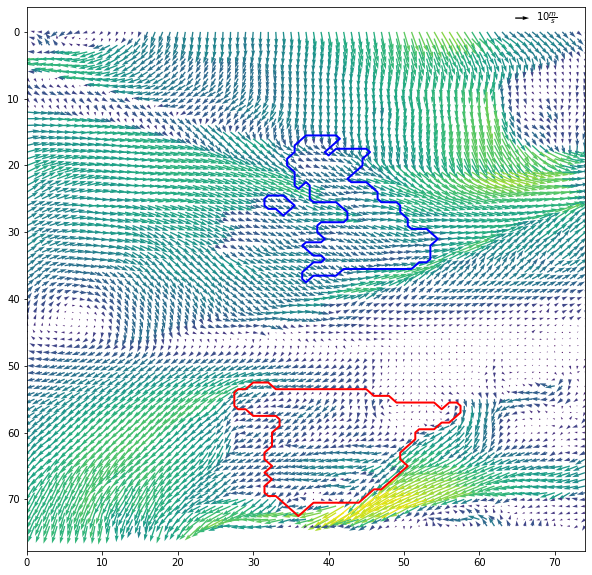

In [89]:
# we can also combine both data sets into a quiver (i.e., arrow) plot
fig, ax = plt.subplots(figsize=(10,10)) # make a bigger plot for better visability

# plot wind arrows, scaled and colored by magnitude 
im_q = ax.quiver(wind_u, wind_v, wind_speed, scale = 400) 
# scale is 'm/s per plot width', i.e. a wind speed of 400 m/s would be shown as an arrow spanning the whole plot width

# add reference vector to top right 
ax.quiverkey(im_q, 0.9, 0.98, 10, r'$10 \frac{m}{s}$', labelpos='E')

#reverse latitude axis
ax.set_ylim(ax.get_ylim()[1], ax.get_ylim()[0])

# add country masks
ax.contour(uk_mask, colors="b", levels = [0.5], linewidths = 2.)
ax.contour(spain_mask, colors="r", levels = [0.5], linewidths = 2.)

In [14]:
np.mean(wind_speed[uk_mask])

7.769209185916657

In [15]:
np.mean(wind_speed[spain_mask])

5.417014417219415

In [16]:
np.mean(wind_dir[uk_mask])

107.43320237681307

In [17]:
np.mean(wind_dir[spain_mask])

-98.73265608426473